# RSVD

Code contributed by Sachin Prasanna (211IT058)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def rsvd(A, r):

    m, n = A.shape

    P = np.random.randn(n, r)

    Z = A @ P

    # Finding the QR decomposition of Z
    Q, _ = np.linalg.qr(Z, mode='reduced')

    # Finding the B matrix, which is the projection of A onto Q
    B = Q.T @ A

    # Finding the SVD of B
    Uhat, S, V = np.linalg.svd(B, full_matrices=False)

    # Making the U matrix
    U = Q @ Uhat

    return U, S, V

In [3]:
img = cv2.imread('assets/rsvd.png', 0)

In [4]:
u_rsvd, s_rsvd, v_rsvd = rsvd(img, 200) 
print(u_rsvd.shape, s_rsvd.shape, v_rsvd.shape)
u_svd, s_svd, v_svd = np.linalg.svd(img, full_matrices=False)
print(u_svd.shape, s_svd.shape, v_svd.shape)

(512, 200) (200,) (200, 512)
(512, 512) (512,) (512, 512)


Text(0.5, 1.0, 'SVD Image')

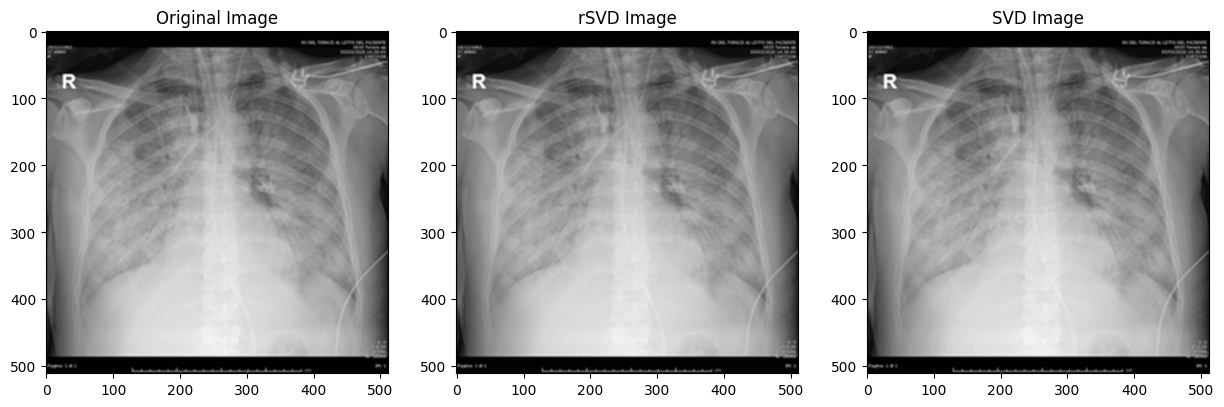

In [5]:
# Plotting both the images side by side

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(u_rsvd @ np.diag(s_rsvd) @ v_rsvd, cmap='gray')
axs[1].set_title('rSVD Image')
axs[2].imshow(u_svd @ np.diag(s_svd) @ v_svd, cmap='gray')
axs[2].set_title('SVD Image')

# generate an image of the fig using cv.write
plt.savefig('generated_assets/rsvd_comparision.png')
# plt.show()
